# Lab 11 Random Permutation, Simulated Sampling, and Hypothesis Testing

## PSU DS 200 Fall 2020

### Instructor: Professor John Yen
### TA: Rupesh Prajapati
### LA: Nathan Tack

## Acknnowledgement: 
Part of this lab is based on materials from UC Berkeley data 8 course.

## Total 11 Exercises:
- Exercise 1: 5 points
- Exercies 2: 5 points
- Exercise 3: 5 points
- Exercise 4: 5 points
- Exercise 5: 15 points
- Exercise 6: 5 points
- Exercise 7: 10 points
- Exercise 8: 10 points
- Exercise 9: 10 points
- Exercise 10: 10 points
- Exercise 11: 10 points

## Total 90 points

## Due: 5 pm Nov 11th

# Learning Objectives of the Lab
- Be able to simulate sampling from a distribution.
- Be able to describe the principle of rejecting a NULL hypothesis.
- Be able to use random permutation to test a hypothesis.
- Be able to compute empirical p value from random permutation test.
- Be able to describe the principle of Student's t-test and p-value.
- Be able to decide whether to reject a NULL hypothesis based on p value.

## Acknowledgement: 
This lab is based on materials from db 8 developed at University of California, Berkeley.  

## Reading Materials for the Lab:
- Chapter 12 (Especially 12.1) of Textbook
https://www.inferentialthinking.com/chapters/12/1/AB_Testing.html


In [1]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


# Mount Google Drive

Like previous labs, we need to first mount the Google Drive in Colab before we can read data from Google Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Copy Data Files into DS200Labs in your Google Drive

Like the previous labs, download the following data files from Canvas, upload them to DS200Labs in your Google Drive.
- baby.csv

After you have done this, run the following "ls" command to make sure this data files is in your DS200Labs directory.  If not, carefully repeat the steps in uploading the file to DS200Labs (review these steps in Lab 1 if needed)

In [3]:
!ls /content/drive/My\ Drive/DS200Labs

baby.csv				  faithful.csv
BC_10_2					  IMDB5000movies.csv
BC_10_2.pdf				  player_data.csv
Ben-NE-9-10-2015-pass-6.csv		  salary_data.csv
Ben_Pass_5_2				  SFSalaries2011_2014.csv
Ben_Pass_5_2.pdf			  station.csv
breast-cancer-wisconsin-data-windCSV.csv  trip.csv
BreatCancerFinal.csv			  Tweets


# Exercise 1 (5 points)
Complete the following code to read the baby.csv file from your DS200Labs folder in your Google Drive.

In [4]:
path = '/content/drive/My Drive/DS200Labs/baby.csv'
babies = Table.read_table(path)
babies.show(10)

Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
1,120,284,27,62,100,False
2,113,282,33,64,135,False
3,128,279,28,64,115,True
4,108,282,23,67,125,True
5,136,286,25,62,93,False
6,138,244,33,62,178,False
7,132,245,23,65,140,False
8,120,289,25,62,125,False
9,143,299,30,66,136,True
10,140,351,27,68,120,False


In [5]:
babies.group('Maternal.Smoker')

Maternal.Smoker,count
False,715
True,459


## Histogram of different groups

Tables of datascience module provide a histogram drawing method that can draw multiple histograms by grouping the data on a particualr column.  For example, the following code
```
babies.his("Maternal.Pregancy.Weight", group="Maternal.Smoker")
```
generates two histograms of weight of pregnant mothers in the "babies" table based on their mother's status regarding smoking (i.e., whether "Maternal.Smoker" column is True or False).


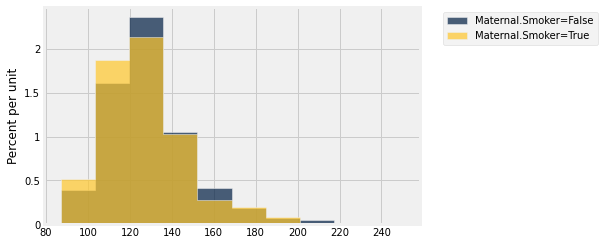

In [6]:
babies.hist('Maternal.Pregnancy.Weight', group='Maternal.Smoker')

# Exercise 2 (5 points)

Complete the following code to display the histogram of the weight of new born babies for two groups of mom (i.e., smokers and non-smokers).



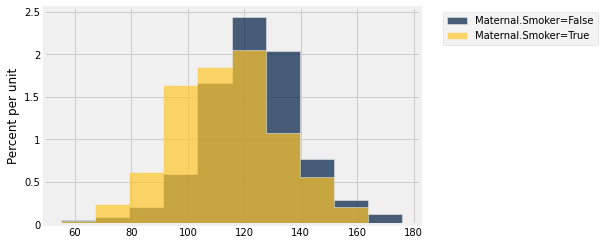

In [7]:
babies.hist("Birth.Weight", group='Maternal.Smoker')

# Hypothesis Testing

Is the difference between the baby's birth weight for these two groups of moms (i.e., smokers and non-smokers) caused by randomness?  

Other examples of such question include:
- Is medicine A better than medicine B for patients with health condition X?
- Do people who smokes have a higher risk for lung cancer?
- For patients who completed a surgery, does walking at least 3 days a week (at least 20 minutes each walk) has better post-surgery recovery outcomes?



# NULL Hypothesis

Null hypothesis is the hypothesis that the difference between two distributions IS due to randomness (i.e., due to the chance of drawing different things from the population), NOT real difference between the populations represented by the two groups.



In [8]:
avg_AB_table = babies.group('Maternal.Smoker', np.average)
avg_AB_table

Maternal.Smoker,Unnamed: 0 average,Birth.Weight average,Gestational.Days average,Maternal.Age average,Maternal.Height average,Maternal.Pregnancy.Weight average
False,585.901,123.085,279.874,27.5441,64.014,129.48
True,589.991,113.819,277.898,26.7364,64.1046,126.919


In [9]:
non_smoker_avg_BW = avg_AB_table.column('Birth.Weight average')[0]
non_smoker_avg_BW

123.08531468531469

In [10]:
smoker_avg_BW = avg_AB_table.column('Birth.Weight average')[1]
smoker_avg_BW

113.81917211328977

In [11]:
diff_avg_AB= smoker_avg_BW - non_smoker_avg_BW
diff_avg_AB

-9.266142572024918

# Compute Difference of Observed Means of Two Groups

The following function ***difference_of_means*** computes the difference of the mean for the column ***label*** of the ***table*** for two different groups 
specified by the ***group_label***.

In [12]:
def difference_of_means(table, label, group_label):
    reduced = table.select(label, group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)


# Exercise 3 (5 points)
Complete the code below to use difference_of_means to compute the different means for the column ***Birth.Weight*** of the table ***babies*** for two different groups specified by ***Maternal.Smoker***.

In [13]:
BW_dif_means = difference_of_means(babies, 'Birth.Weight', 'Maternal.Smoker')
BW_dif_means

-9.266142572024918

# Random Permutation for Testing Null Hypothesis

If the NULL hypothesis is correct, a baby's birth weight should not be affected by the smoking condition of the baby's mom.  Hence, randomly shuffl the smoking condition among the mothers should not, on the average, affect their baby's birth weight.  This is referred to as **random permutation**. 

More specifically, applying random permutation to the birth weight data involves the following steps:
- Randomly shuffle the "smoker" and "non-smoker" value to all moms (just for comparison, not changing the real data). By shuffling, we mean the total number of "smokers" and "non-smokers" remain the same as the original data.
- Compute the mean birth weight for the shuffled "smoking" group.
- Compute the mean birth weight for the shuffled "non-smoking" group.
- Compute the difference of the two means.

We implement this random permutation by first creating a random smoker/non-smoker status for all moms in the datase using 
```
shuffled_MS_lables = babies.sample(with_replacement = False).column('Maternal.Smoker')
```
The sample method randomly selects row from the original babies table.  Because we set the parameter
```
with_replacmenet = False
```
each row can only be selected once (because they are not returned/replaced after it is selected/sampled). As a
result, we get a table whose rows are in different order compared to the original babies table. By selecting the column 'Maternal.Smoker" from this table, we get a
different order of smoker vs non-smoker status for the babies table.  

If we assign this array of smoker/non-smoker status to the original table as a new column called 'Shuffled Maternal.Smoker'
```
babies_with_shuffled_MS_lables = babies.with_column('Shuffled Maternal.Smoker', shuffled_MS_lables)
```
we create a different data set where the smoker/non-smoker status is randomly assigned. 


In [14]:
shuffled_MS_lables = babies.sample(with_replacement= False).column('Maternal.Smoker')
babies_with_shuffled_MS_lables = babies.with_column('Shuffled Maternal.Smoker', shuffled_MS_lables)
babies_with_shuffled_MS_lables.show(10)

Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker,Shuffled Maternal.Smoker
1,120,284,27,62,100,False,False
2,113,282,33,64,135,False,True
3,128,279,28,64,115,True,False
4,108,282,23,67,125,True,True
5,136,286,25,62,93,False,False
6,138,244,33,62,178,False,True
7,132,245,23,65,140,False,False
8,120,289,25,62,125,False,False
9,143,299,30,66,136,True,True
10,140,351,27,68,120,False,True


# Exercise 4 (5 points)
Complete the code below to use difference_of_means to compute the different means for the column ***Birth.Weight*** of the table ***babies*** for two different groups specified by ***Shuffled Maternal.Smoker***.


In [15]:
difference_of_means(babies_with_shuffled_MS_lables, 'Birth.Weight', 'Shuffled Maternal.Smoker')

0.8395904748845879

The result of difference of means for one random shuffle can differ from difference of means for another random shuffle. (***Note: Due to the randomness nature of random shuffle, different random shuffle generates different permutation of labels, which lead to different difference of means for the two shuffled labels.***)

In order to have a more reliable assessment about whether NULL hypothesis should be rejected, 
we need to perform random shuffle many times to generate many difference of means, one for each random shuffle.
This way, we can compare all of these differences of means, not just one generated by one random shuffle, with the actual difference of means.

To facilitate this, we can define a Python function that can generate one random permutation and return the difference of means using that random shuffle. The function
```
one_simulated_difference
```
is such a function. 

This function can be called multiple times to generate multiple difference of means using random shuffle. can more easily use/call it.  For example, we can call it 1000 time to generate 1000 difference of means, one for each random permutation of the original labels. The function takes three parameters:
- table: a Table (defined in datascience module)
- label: the column for computing means for group A and group B.
- group_label: The column that specifies the category for each row in the table.

For example, to compute the difference of means for one random permutation of the ***babies*** table, we can 
call the function with the following parameters:
```
one_simulated_difference( babies, 'Birth.Weight', 'Maternal.Smoker')
```

*** Learning Tips***: Most of the functions in Python are deterministic. A deterministic function returns the same output for the same inputs. The function ***one_simulated_difference*** is ***non-deterministic*** because it returns different output when it is called multiple times with the same inputs.  This is because the function simulates the result of a random process (i.e., random sampling). 

In [16]:
def one_simulated_difference(table, label, group_label):
    shuffled_labels = table.sample(with_replacement = False
                                                    ).column(group_label)
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels)
    return difference_of_means(shuffled_table, label, 'Shuffled Label') 

# Exercise 5 Implementing Random Permutation Test (15 points)

- (a) Complete the following two code cells to perform at least 1000 random permutations. Be patient to allow the first code cell to complete before you execute the next code cell.  The second code cell displays the histogram of the difference of means for all the random permutations you have performed.  
- (b) Discuss what you learned from this result regarding the NULL Hypothesis and compare it with that of one-time random permutation/shuffle in Exercise 4.

In [17]:
differences = make_array()

repetitions = 1000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(babies, 'Birth.Weight', 'Maternal.Smoker')
    differences = np.append(differences, new_difference)                               

Observed Birth Weight Difference: -9.266142572024918


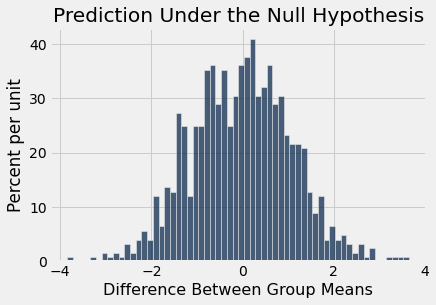

In [60]:
Diff_table = Table().with_column('Difference Between Group Means', differences)
Diff_table.hist(bins=60)
print('Observed Birth Weight Difference:', BW_dif_means )
plots.title('Prediction Under the Null Hypothesis');


In [61]:
Diff_table.show(10)

Difference Between Group Means
-0.519765
-0.348057
1.1365
0.585606
-0.498301
-1.36042
-0.830986
0.0382863
0.692923
0.7752


b) The result of difference of means for one random shuffle can differ from difference of means for another random shuffle. NULL Hypothesis perform random shuffle many times, so it has more reliable difference of means.

# Compute Empirical p from Random Permutation

The following code compute empirical p value from random permutation.  The empirical p value is the chance that the observed difference of means between category A (e.g., weight of babies delivered by smoking mom) and category B (e.g., weight of babies delivered by non-smoking mom) occurs among random permutations.  

Another common method for determining whether the NULL hypothesis should be rejected is T-test, which we will discuss below.

In [18]:
empirical_P = np.count_nonzero(differences <= BW_dif_means) / repetitions
empirical_P

0.0

## Limitation of Random Permutation

One limitation of random permutation is that it requires a significant number of observed cases for the two categories.  Otherwise, the result of random permutation using the observed cases may not be a reliable approximation of the result of random permutation on the underlying population.  This is analogous to the need of a large random samples for a reliable statical inference/estimate of the population's medium (using the sample's medium).

This limitation is important because real-world hypothesis testing are often constrained by the size of the observed samples.  For example, an experiment (i.e., human-subject study) to test a hypothesis such as *** Does medicine A improve the health outcome for patients with condition X?*** needs to recruit patients with
condition X to participate the study.  Important 
principles in this recruiting process are 
- The subjects should be informed about the purpose of the study, the potential risk involved, and the potential benefits.
- Each subject decide whether he/she would like to participate the study.
- The subject can decide to withdraw from the study after he/she agrees (consents) to participate the study.

As a result, the following factors constrain the size of the people who participate in a human-subject study:
- The number of people at the study site (e.g., a hospital) that has condition X.
- The percentage of people with condition X at the site who agrees to participate the study.
- The percentage of people who withdraws from the study after they initially agree to participate.
- The frequency that a patient with condition X visits the hospital.
- The time allocated to recuring patients for the study.
- The cost and resources needed to support each participating patient throughout the study.

For these reasons, the size of two groups (typically called "control group" and the "experiment group") for many research studies regarding health-related interventions is much smaller than that of the 
dataset regarding birth weight of babies and their
mom's smoking/non-smoking condition.

An alternative way to test NULL hypothesis that addresses this limitation of random permutation is the Student t-test.




# Using Student's T-Test for Rejecting NULL Hypothesis

A student's t-test assesses whether the NULL hypothesis that samples of a variable of interest (e.g., birth weight of babies) from two groups (e.g., those born by smoking moms and those born by non-smoking moms) are from an identical population.   In another word, the 
NULL hypothesis states that the observed differences, if any, of the two samples are due to chances in random
drawing from the population. The Student t-test 
typically makes three assumptions:
- 1. The distribution(s) are Normal/Gaussian Distributions.
- 2. The distribution(s) have the same standard deviation.
- 3. The size of the two groups are the same.

While a detailed discussion about t-test is the topic of a Statistics course, we will use the following exercises to demonstrate two points:
- 1. The result of the student's t-test does not just depend on the difference of means between two samples.
- 2. The result of the student's t-test also depends on the standard deviation of the Normal distribution.

Therefore, we will first talk about standard deviation before we continue on Student's t-test.

# Standard Deviation of a Probability Distribution

The standard deviation of a probability distribution is, intuitively, how wide is the variation of probability
around its mean.  The wider is the variation, the larger
is the standard deviation. 

As we will see later, one important factor that affects the outcome of hypothesis testing is the standard deviation of the probability distribution in the population. 

*** Learning Tip: *** The standard deviation of a probability distribution is related to the variance of the distribution: Variance(X) = sd(X)^2. 

# Gaussian/Normal Distribution

A Gaussian/Normal Distribution is defined by two parameters: mean and standard deviation.

Below is an example of Gaussain/Normal distribution with mean 50, and standard deviation 5. Once you exeucte the two code cells below, you can see a plot of a red curve and a blue-colored histogram.  The blue colored histogram is generated by 100 random samples from the Gaussian/Normal distribution.  The red line represents the probability density function for the Gaussian/Normal distribution. 

*** Learning Tip: *** What will happen if you reduce the size of the sample (e.g., say to 30)? Is this related to something we discussed earlier in the semester?

In [19]:
import numpy as np
mean = 50
sd = 5
size = 1000
sample_A = np.random.normal(mean, sd, size)

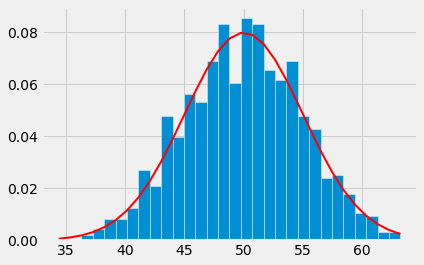

In [64]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(sample_A, 30, density=True)
plt.plot(bins, 1/(sd * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * sd**2) ),
         linewidth=2, color='r')
plt.show()

# Exercise 6 (5 points)

Choose a standard deviation larger than the example above and fill in the standard deviation in the code below.  Execute the code, and discuss whether the distribution generatred is broader/wider or narrower compared to that of the previous example.

In [20]:
import numpy as np
mean2 = 50
sd2 = 15
size2 = 1000
sample_A2 = np.random.normal(mean2, sd2, size2)

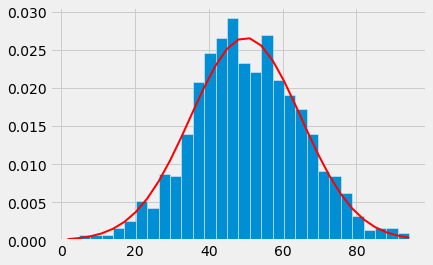

In [66]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(sample_A2, 30, density=True)
plt.plot(bins, 1/(sd2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean2)**2 / (2 * sd2**2) ),
         linewidth=2, color='r')
plt.show()

# Answer to Exercise 6
The distribution generatred is broader than previous example.

# Plotting Two Gaussian Distributions

The following code cell plots two Gaussian Distributions so that their relationships (e.g., overlap region) can be more easily identified.

The variable mean and sd specifies the mean and standard deviation of the blue Gaussian distribution.  The variable mean2 and sd2 specifies the mean and standard deviation of the red Gaussian distribution, respecitvely.

Change the two standard deviations to the same number and see how the overlapping region of the two Gaussian distribution changes.

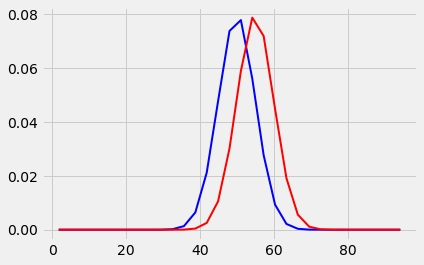

In [67]:
import matplotlib.pyplot as plt
mean=50
sd=5
mean2=55
sd2=5
plt.plot(bins, 1/(sd * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 /(2 * sd**2) ), 
         linewidth=2, color='b')
plt.plot(bins, 1/(sd2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean2)**2 / (2 * sd2**2) ),
         linewidth=2, color='r')
plt.show()

# Simulated Random Samples from Normal Distributions

In the second part of this lab, we are going to use simulated random samples from normal distribution(s) to demonstrate the relationship between the standard deviation of the Normal distribution and A/B hypothesis tesing.

## Two Random Samples from a Normal Distribution

We will do this in the following steps:
- 1. We assume the probability distribution of an observed variabble for an underlying population is a Normal/Gaussian Distribution.  This assumption is often made for real variable for real population, and the assumption can be checked using observed data.
- 2. We set the mean and variance for this hypothetical variable.  In the real world, we infer/estimate the mean and variance from the observed samples.
- 3. We generate two random samples from the same population.
- 4. We calculate the difference of means for these two samples.
- 5. We calculate p-value to see whether the NULL hypothesis can be rejected (i.e., whether the observed difference of the two samples can be due to chance).

# Step 1, 2, 3 Simulating Random Samples from A Normal Distribution 

The python code for generating random samples from a normal distribution is
```
numpy.random.normal(mean, variance, size)
```
The function has three parameters:
- The first parameter is the mean of the normal distribution.
- The second parameter is the standard deviation of the normal distribution.
- The third parameter is the size of the random samples to be drawn from the population.

Because we have imported numpy module as np in the beginning of this notebook:
```
import numpy as np
```
The function above will be invoked as np.random.normal in this notebook.

In [21]:
mean = 50
sd = 10
size = 30
sample_A = np.random.normal(mean, sd, size)
print(sample_A)

[60.24241022 40.91832426 45.31272113 57.84293702 59.08186238 29.78624525
 54.93528398 57.61043562 68.37226065 37.09034716 43.50700573 47.88506661
 38.71962425 76.33193521 34.93210605 41.15224493 45.93624949 56.14717306
 48.15797613 52.84402816 41.21267459 47.73554339 38.83256018 32.26418263
 46.40299816 65.72818613 46.834494   53.58736293 45.26119976 41.48655164]


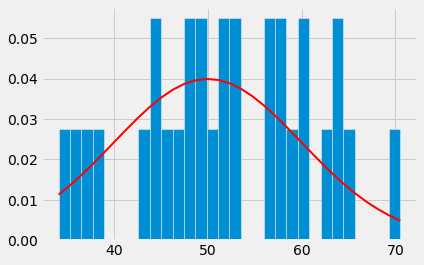

In [69]:
import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(sample_A, 30, density=True)

plt.plot(bins, 1/(sd * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mean)**2 / (2 * sd**2) ),

         linewidth=2, color='r')

plt.show()

In [22]:
mean=55
sd = 10
size = 30
sample_B = np.random.normal(mean, sd, size)
print(sample_B)

[47.39271959 73.19209388 58.13119192 60.45365742 70.99094034 50.19793771
 53.24558687 64.04137788 58.87536164 48.57884042 37.22921604 65.23711522
 74.25720562 56.87207347 62.9033641  58.72219521 49.76913162 66.13802189
 61.2179956  47.13063027 67.30733763 46.39668803 67.54882466 56.99396586
 64.72749945 42.61911535 57.44250507 46.66370556 44.34629207 62.60420653]


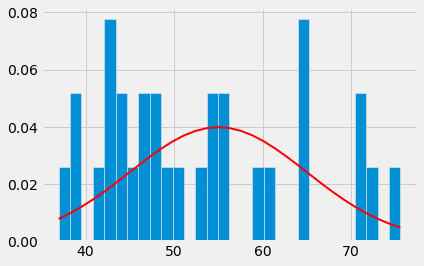

In [71]:
count, bins, ignored = plt.hist(sample_B, 30, density=True)

plt.plot(bins, 1/(sd * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mean)**2 / (2 * sd**2) ),

         linewidth=2, color='r')

plt.show()

# Step 4 Compute the Difference of Observed Means in the Two Samples

In [23]:
A_means = np.mean(sample_A)
A_means

48.53839968959592

In [24]:
B_means = np.mean(sample_B)
B_means

57.3742265647083

In [25]:
AB_means_dif = A_means - B_means
AB_means_dif

-8.835826875112382

# Step 5 T-Test and p-value for Rejecting Null Hypothesis

In this lab, we use the scipy Python module, which provides ttest_ind in its stats submocule for performing student's t-test.

In [26]:
import scipy
from scipy import stats

In [27]:
t_test = scipy.stats.ttest_ind(sample_A, sample_B)
print(t_test)

Ttest_indResult(statistic=-3.3351279514616334, pvalue=0.0014909325139304936)


The p-value is part of the result returned by the t-test.

# Interpreting P-value

The standard practice for rejecting null hypothesis is to require the p-value (generated from t test) to be less than 0.05. If p-value is larger than 0.05, then we CAN NOT REJECT the NULL Hypothesis.  In another word, when the p-value from two samples is larger than 0.05, we can not rule out the possibility that the difference of the two samples are entirely due to chance.

# Exercise 7 (10 points)
Based on the p-value, can you reject the NULL hypothesis?

# Answer to Exercise 7:
Yes, the p-value is 0.0014909325139304936 which less than 0.05, so we can reject the null hypothesis.

# Simulated Random Samples from Two Normal Distributions

In the following exercise, we are going to simulate drawing two random samples from TWO NORMAL DISTRIBUTIONS with identical variance, which is small compared to the difference of their mean. Let's see whether such two random samples can reject NULL hypothesis based on Student t-test.

# Exercise 8 (10 points)

Complete the code below to create two random samples of size 30 from TWO Normal Distributions whose mean are 50 and 55 respectively.  Assume the variance is 2.5 for both distributions. 

In [28]:
mean = 50
sd = 2.5
size = 30
sample_C = np.random.normal(mean, sd, size)
print(sample_C)

[51.82420304 49.71543216 51.18425492 46.67269598 52.9799738  47.06535863
 52.75511807 44.9106058  49.43618414 50.20286881 50.70669855 51.41879217
 51.43735281 47.41401937 49.58655182 52.37022407 46.5615646  52.5763738
 47.88384446 49.81888063 52.3685156  44.92690318 43.89792239 50.01975211
 46.46622257 51.80982538 46.38691223 49.18233536 54.13090541 49.26134169]


In [29]:
mean = 55
sd = 2.5
size = 30
sample_D = np.random.normal(mean, sd, size)
print(sample_D)

[56.38789287 52.4243037  55.23384077 57.53765011 52.83983697 56.29339006
 57.13374554 55.87577639 56.83862487 54.81296828 53.70281094 60.88140296
 57.94378183 53.52034302 55.66722275 55.14004209 60.02243746 60.69451193
 53.92330075 52.39353402 56.3891699  53.6654628  50.59145488 57.27873181
 55.30770653 54.89812506 54.78527299 57.09548799 56.40805785 58.28710135]


# Exercise 9 (10 points)
Complete the following code to determine (a) the difference of the means of the two samples, (b) the p-value, and (c) whether NULL hypothesis can be rejected based on the p-value.

In [30]:
CD_mean_dif = np.mean(sample_C) - np.mean(sample_D)
print(CD_mean_dif)

-6.300078497315937


In [31]:
t_test = scipy.stats.ttest_ind(sample_C, sample_D)
print(t_test)

Ttest_indResult(statistic=-9.467598160396262, pvalue=2.2647887154108385e-13)


# Answer to Exercise 9:
- (a)-6.300078497315937
- (b)2.2647887154108385e-13
- (c)p-value < 0.05, so the NULL hypothesis can be rejected.

# Exercise 10 (10 points)

Complete the following code to create two random samples of 30 from TWO Normal Distributions whose means are 50 and 55 respectively, and whose standard deviation are both a number greater than 10. Based on the results, answer the following three questions:
- (a) the difference of means
- (b) the p-value
- (c) whether NULL hypothesis should be rejected.

In [32]:
mean = 50
sd = 20
size = 30
sample_C = np.random.normal(mean, sd, size)
print(sample_C)

[-1.41997016 42.98616638 55.92303516 38.28037322 54.16925924 72.71549599
 58.4469502  58.81634994 17.03035396 58.97726929 55.83023306  9.21820608
 48.86444508 63.12898217 33.78921375 55.05267855 34.83491859 38.36169561
 78.97233601 27.74074419 54.20563193 87.4571851  42.42755044 76.28215398
 50.41415945 55.02779637 66.65018591 51.45390006 66.74892084 35.40738035]


In [33]:
mean = 55
sd = 20
size = 30
sample_D = np.random.normal(mean, sd, size)
print(sample_D)

[ 53.64631112  27.35021616  44.61829987  78.73448064  76.29622234
  82.91954364  62.14601645  89.03815766 107.77148689  82.43689471
  30.40860511  54.37558355  62.0230487   54.05286958  95.893402
  55.23581467  44.42979889  62.41414578  55.83006368  74.4411312
  48.98237197  78.37603275  43.31965851  49.25388351  70.19436553
  84.75303226  53.14666062  25.01845494  61.6211245   55.70027406]


In [34]:
CD_mean_dif = np.mean(sample_C) - np.mean(sample_D)
print(CD_mean_dif)

-12.554478351919194


In [35]:
t_test = scipy.stats.ttest_ind(sample_C, sample_D)
print(t_test)

Ttest_indResult(statistic=-2.435881932880659, pvalue=0.017948665539781566)


(a) -12.554478351919194
(b) 0.017948665539781566
(c) p-value < 0.05, so NULL hypothesis should be rejected.

# Exercise 11 (10 points)

Suppose X and Y are two populations with Normal Distributions with different means and identical standard deviation. Suppose sample A and sample B are random samples of size 30 from X and Y respectively. What do you think is the relationship between standard deviation and whether NULL hypothesis that "observed difference between sample A and sample B is due to chance" can be rejected?


# Answer to Exercise 11:

The sample of size and standard deviation are the same, and means are different. As the results of exercise 9 & 10, the p-value will less than 0.05, so the NULL hypothesis can be rejected.
